## Magboltz output reader

In [1]:
import re
import glob
import pandas as pd


In [2]:
def extract_values_magboltz_output(lines):
    z_dv_pattern = r"Z DRIFT VELOCITY = ([\d.]+E[\+\-]\d+) MICRONS/NANOSECOND\s*\+-\s*([\d.]+)%"
    diff_pattern = r"=\s*([\d.]+)\s*MICRONS/CENTIMETER\*\*0.5\s*\+-\s*([\d.]+)%"

    z_dv_match = re.search(z_dv_pattern, lines[65]) # Line 66 (index 65)
    t_diff_match = re.search(diff_pattern, lines[75]) # Line 76 (index 75)
    l_diff_match = re.search(diff_pattern, lines[80]) # Line 81 (index 80)

    if z_dv_match and t_diff_match and l_diff_match:
        z_dv = (float(z_dv_match.group(1)), float(z_dv_match.group(2)))
        t_diff = (float(t_diff_match.group(1)) /1000, float(t_diff_match.group(2)))
        l_diff = (float(l_diff_match.group(1)) /1000, float(l_diff_match.group(2)))

        z_dv = (z_dv[0], z_dv[0] * z_dv[1] / 100)
        t_diff = (t_diff[0], t_diff[0] * t_diff[1] / 100)
        l_diff = (l_diff[0], l_diff[0] * l_diff[1] / 100)

        return z_dv, t_diff, l_diff
    else:
        return None, None, None

In [3]:
get_p_and_v = lambda x: (float(x.split('_')[-2][:-3]), float(x.split('_')[-1].split('.')[0][:-1]))

indir = '/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/magboltz/pressure_sim/prod/'

files = sorted(glob.glob(indir + '*'), key = get_p_and_v)

In [4]:
# results = []
# for f in files:
#     p, v = get_p_and_v(f)
#     with open(f, 'r') as text:
#         lines = text.readlines()

#     z_dv, t_diff, l_diff = extract_values_magboltz_output(lines)
#     results.append([p, v, z_dv[0], z_dv[1], t_diff[0], t_diff[1], l_diff[0], l_diff[1]])
# df = pd.DataFrame(results, columns = ['p', 'v', 'zdv', 'zdv_err', 't_diff', 't_diff_err', 'l_diff', 'l_diff_err'])

#df.to_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/magboltz/pressure_sim/results.h5', 'results')

In [5]:
df = pd.read_hdf('/mnt/lustre/scratch/nlsas/home/usc/ie/mpm/NEXT100/magboltz/pressure_sim/results.h5', 'results')
df['EP'] = df.v / df.p

In [6]:
print('Pressures = ', df.p.unique())
print('Field     = ', df.v.unique())

Pressures =  [ 1.   2.   3.   4.   4.2  4.4  4.6  4.8  5.   5.5  6.   7.   8.   9.
 10.  11.  12.  13.  13.2 13.4 13.5 13.6 13.8 14.  15.  16.  17.  18.
 19.  20. ]
Field     =  [ 50. 100. 150. 200. 250. 300. 350. 400.]


In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
df_400 = df[df.v == 400]

Text(0.5, 1.0, 'Drift velocity')

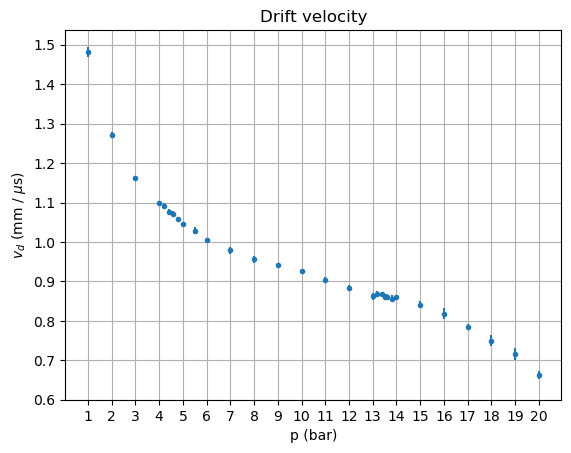

In [9]:
plt.errorbar(df_400.p, df_400.zdv, yerr=df_400.zdv_err, fmt = '.')
plt.ylabel(r'$v_{d}$ (mm / $\mu$s)')
plt.xlabel('p (bar)')
plt.grid()
plt.xticks(np.arange(1, 21, 1))
plt.yticks(np.arange(0.6, 1.6, 0.1))
plt.title('Drift velocity')
# plt.xlim((12.9, 14.1))
# plt.ylim((0.8, 0.9))

Text(0.5, 1.0, 'Transverse diffusion')

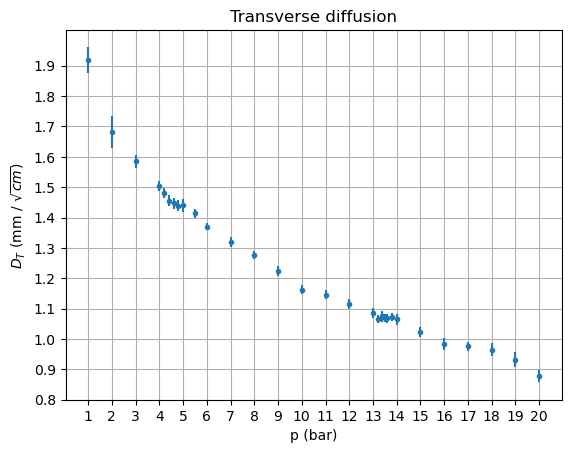

In [10]:
plt.errorbar(df_400.p, df_400.t_diff, yerr=df_400.t_diff_err, fmt = '.')
plt.ylabel(r'$D_{T}$ (mm / $\sqrt{cm}$)')
plt.xlabel('p (bar)')
plt.grid()
plt.xticks(np.arange(1, 21, 1))
plt.yticks(np.arange(0.8, 2, 0.1))
plt.title('Transverse diffusion')

Text(0.5, 1.0, 'Longitudinal diffusion')

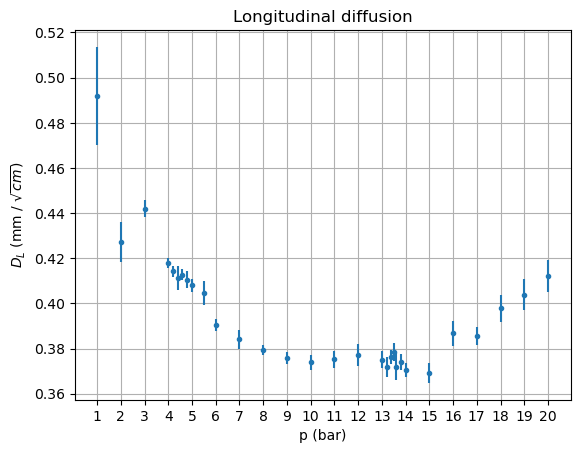

In [11]:
plt.errorbar(df_400.p, df_400.l_diff, yerr=df_400.l_diff_err, fmt = '.')
plt.ylabel(r'$D_{L}$ (mm / $\sqrt{cm}$)')
plt.xlabel('p (bar)')
plt.grid()
plt.xticks(np.arange(1, 21, 1))
plt.yticks(np.arange(0.36, 0.52, 0.02))
plt.title('Longitudinal diffusion')

Text(0.5, 1.0, '')

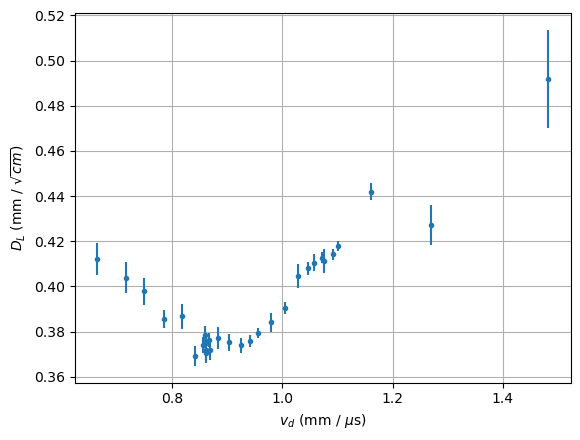

In [12]:
plt.errorbar(df_400.zdv, df_400.l_diff, yerr=df_400.l_diff_err, fmt = '.')
plt.ylabel(r'$D_{L}$ (mm / $\sqrt{cm}$)')
plt.xlabel(r'$v_{d}$ (mm / $\mu$s)')
plt.grid()
# plt.xticks(np.arange(1, 21, 1))
# plt.yticks(np.arange(0.36, 0.52, 0.02))
plt.title('')

Text(0.5, 1.0, '')

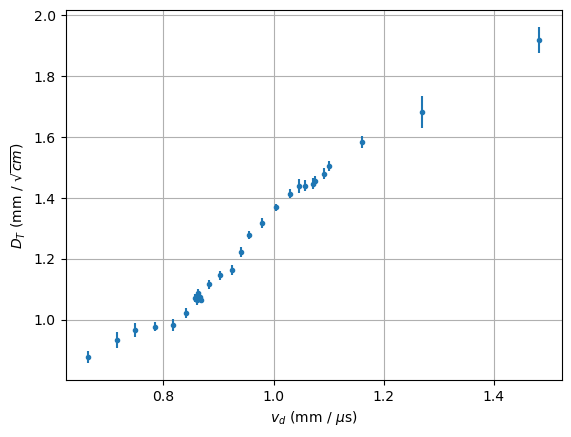

In [13]:
plt.errorbar(df_400.zdv, df_400.t_diff, yerr=df_400.t_diff_err, fmt = '.')
plt.ylabel(r'$D_{T}$ (mm / $\sqrt{cm}$)')
plt.xlabel(r'$v_{d}$ (mm / $\mu$s)')
plt.grid()
# plt.xticks(np.arange(1, 21, 1))
# plt.yticks(np.arange(0.36, 0.52, 0.02))
plt.title('')

Text(0.5, 1.0, '')

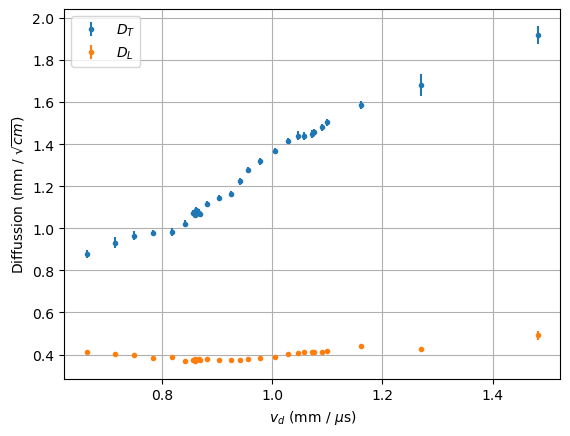

In [14]:
plt.errorbar(df_400.zdv, df_400.t_diff, yerr=df_400.t_diff_err, fmt = '.', label = r'$D_{T}$')
plt.errorbar(df_400.zdv, df_400.l_diff, yerr=df_400.l_diff_err, fmt = '.', label = r'$D_{L}$')

plt.ylabel(r'Diffussion (mm / $\sqrt{cm}$)')
plt.xlabel(r'$v_{d}$ (mm / $\mu$s)')
plt.grid()
# plt.xticks(np.arange(1, 21, 1))
# plt.yticks(np.arange(0.36, 0.52, 0.02))
plt.legend()
plt.title('')

Text(0.5, 1.0, '')

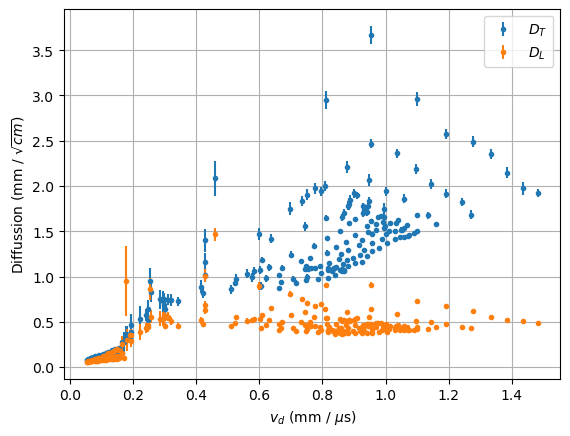

In [15]:
plt.errorbar(df.zdv, df.t_diff, yerr=df.t_diff_err, fmt = '.', label = r'$D_{T}$')
plt.errorbar(df.zdv, df.l_diff, yerr=df.l_diff_err, fmt = '.', label = r'$D_{L}$')

plt.ylabel(r'Diffussion (mm / $\sqrt{cm}$)')
plt.xlabel(r'$v_{d}$ (mm / $\mu$s)')
plt.grid()
# plt.xticks(np.arange(1, 21, 1))
# plt.yticks(np.arange(0.36, 0.52, 0.02))
plt.legend()
plt.title('')

Text(0.5, 1.0, '')

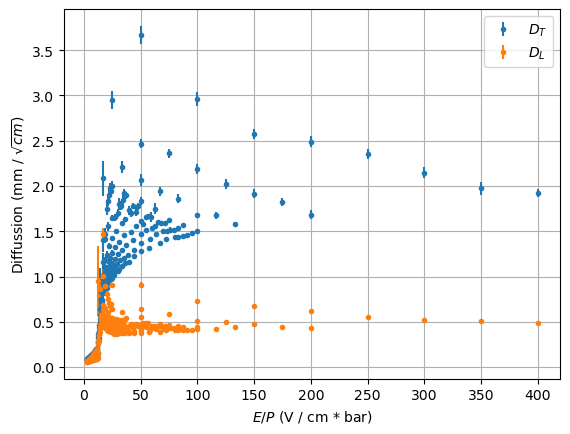

In [16]:
plt.errorbar(df.EP, df.t_diff, yerr=df.t_diff_err, fmt = '.', label = r'$D_{T}$')
plt.errorbar(df.EP, df.l_diff, yerr=df.l_diff_err, fmt = '.', label = r'$D_{L}$')

plt.ylabel(r'Diffussion (mm / $\sqrt{cm}$)')
plt.xlabel(r'$E / P$ (V / cm * bar)')
plt.grid()
# plt.xticks(np.arange(1, 21, 1))
# plt.yticks(np.arange(0.36, 0.52, 0.02))
plt.legend()
plt.title('')

Text(0.5, 1.0, '')

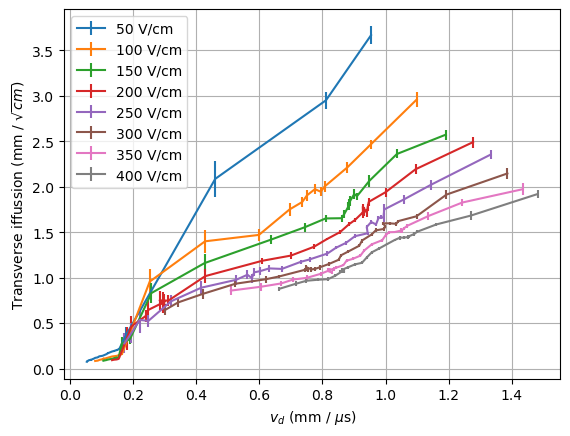

In [17]:
for v in df.v.unique():
    volt_df = df[df.v == v]
    plt.errorbar(volt_df.zdv, volt_df.t_diff, yerr=volt_df.t_diff_err, fmt = '-', label = '{} V/cm'.format(int(v)))
    # plt.errorbar(df.zdv, df.l_diff, yerr=df.l_diff_err, fmt = '.', label = r'$D_{L}$')

plt.ylabel(r'Transverse iffussion (mm / $\sqrt{cm}$)')
plt.xlabel(r'$v_{d}$ (mm / $\mu$s)')
plt.grid()
# plt.xticks(np.arange(1, 21, 1))
# plt.yticks(np.arange(0.36, 0.52, 0.02))
plt.legend()
plt.title('')

Text(0.5, 1.0, '')

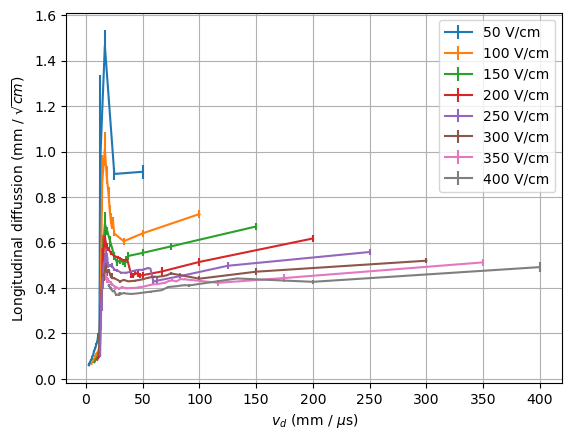

In [18]:
for v in df.v.unique():
    volt_df = df[df.v == v]
    plt.errorbar(volt_df.EP, volt_df.l_diff, yerr=volt_df.l_diff_err, fmt = '-', label = '{} V/cm'.format(int(v)))

plt.ylabel(r'Longitudinal diffussion (mm / $\sqrt{cm}$)')
plt.xlabel(r'$v_{d}$ (mm / $\mu$s)')
plt.grid()
# plt.xticks(np.arange(1, 21, 1))
# plt.yticks(np.arange(0.36, 0.52, 0.02))
plt.legend()
plt.title('')

Text(0.5, 1.0, '')

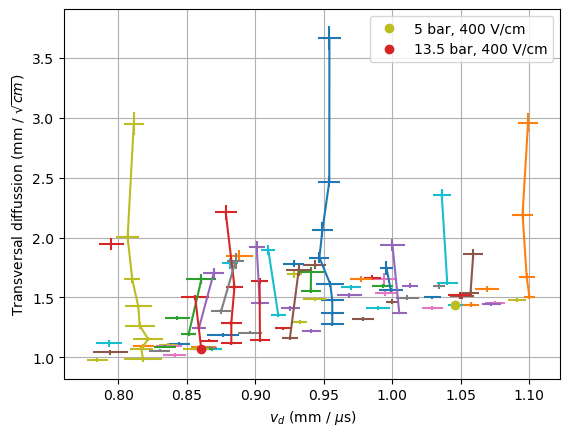

In [63]:
for EP in df.EP.unique():
    red_field_df = df[(df.EP == EP) & (df.zdv < 1.12) & (df.zdv > 0.78)]
    def hot_point_plotter(df, p, v):
        hp = df[(df.p == p) & (df.v == v)]
        if len(hp) > 0:
            plt.plot(hp.zdv, hp.t_diff, 'o', label = '{p} bar, {v} V/cm'.format(p=p, v=v))
    hot_point_plotter(red_field_df, 5, 400)
    hot_point_plotter(red_field_df, 13.5, 400)
    plt.errorbar(red_field_df.zdv, red_field_df.t_diff, yerr=red_field_df.t_diff_err, xerr=red_field_df.zdv_err, fmt = '-') #, label = '{} V/(cm * bar)'.format(EP))
    # plt.errorbar(df.zdv, df.l_diff, yerr=df.l_diff_err, fmt = '.', label = r'$D_{L}$')

plt.ylabel(r'Transversal diffussion (mm / $\sqrt{cm}$)')
plt.xlabel(r'$v_{d}$ (mm / $\mu$s)')
plt.grid()
# plt.xticks(np.arange(1, 21, 1))
# plt.yticks(np.arange(0.36, 0.52, 0.02))
plt.legend()
plt.title('')

Text(0.5, 1.0, '')

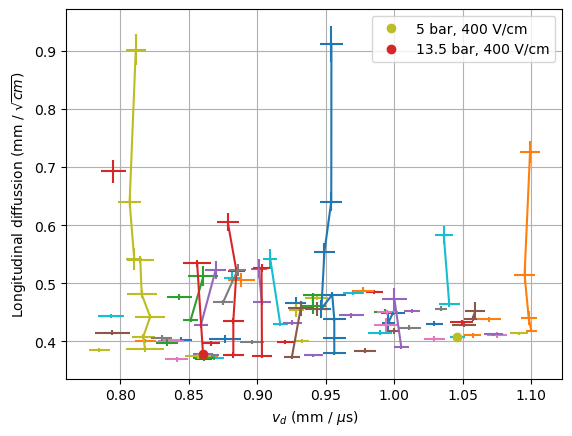

In [86]:
for EP in df.EP.unique():
    red_field_df = df[(df.EP == EP) & (df.zdv < 1.12) & (df.zdv > 0.78)]
    def hot_point_plotter(df, p, v):
        hp = df[(df.p == p) & (df.v == v)]
        if len(hp) > 0:
            plt.plot(hp.zdv, hp.l_diff, 'o', label = '{p} bar, {v} V/cm'.format(p=p, v=v))
    hot_point_plotter(red_field_df, 5, 400)
    hot_point_plotter(red_field_df, 13.5, 400)
    plt.errorbar(red_field_df.zdv, red_field_df.l_diff, yerr=red_field_df.l_diff_err, xerr=red_field_df.zdv_err, fmt = '-') #, label = '{} V/(cm * bar)'.format(EP))
    # plt.errorbar(df.zdv, df.l_diff, yerr=df.l_diff_err, fmt = '.', label = r'$D_{L}$')

plt.ylabel(r'Longitudinal diffussion (mm / $\sqrt{cm}$)')
plt.xlabel(r'$v_{d}$ (mm / $\mu$s)')
plt.grid()
# plt.xticks(np.arange(1, 21, 1))
# plt.yticks(np.arange(0.36, 0.52, 0.02))
plt.legend()
plt.title('')

Text(0.5, 1.0, '')

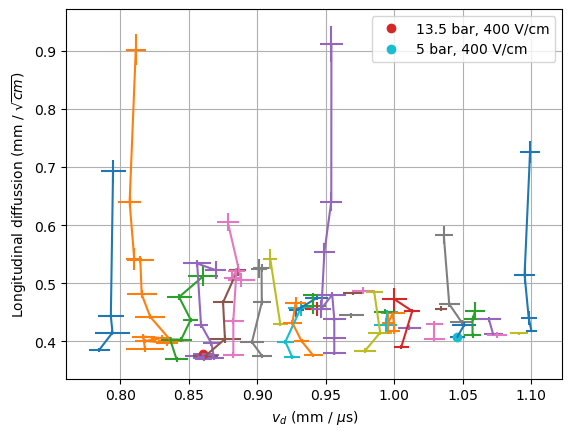

In [198]:
precision = 2
rang = (2.5, 400)

for EP in np.arange(rang[0], rang[1], precision): #df.EP.unique():
    red_field_df = df[(df.EP >= EP) & (df.EP < EP + precision) & (df.zdv < 1.12) & (df.zdv > 0.78)]
    def hot_point_plotter(df, p, v):
        hp = df[(df.p == p) & (df.v == v)]
        if len(hp) > 0:
            plt.plot(hp.zdv, hp.l_diff, 'o', label = '{p} bar, {v} V/cm'.format(p=p, v=v))
    hot_point_plotter(red_field_df, 5, 400)
    hot_point_plotter(red_field_df, 13.5, 400)
    plt.errorbar(red_field_df.zdv, red_field_df.l_diff, yerr=red_field_df.l_diff_err, xerr=red_field_df.zdv_err, fmt = '-') #, label = '{} V/(cm * bar)'.format(EP))
    # plt.errorbar(df.zdv, df.l_diff, yerr=df.l_diff_err, fmt = '.', label = r'$D_{L}$')

plt.ylabel(r'Longitudinal diffussion (mm / $\sqrt{cm}$)')
plt.xlabel(r'$v_{d}$ (mm / $\mu$s)')
plt.grid()
# plt.xticks(np.arange(1, 21, 1))
# plt.yticks(np.arange(0.36, 0.52, 0.02))
plt.legend()
plt.title('')

In [190]:
import random
from itertools import product

p_values = np.array([1, 2, 5, 13.5, 20]) #np.arange(1, 20.1, 5)  # p from 1 to 20 with step 0.5
E_values = np.arange(50, 400.1, 50) 
precision = 3
npoints = 5
EP_values = [pair for pair in product(E_values, p_values) if pair[0] / pair[1] > 20 and pair[0] / pair[1] < 100]

for EP in EP_values:
    E = EP[0]
    p = EP[1]
    N = E / p
    print(E, p)
    for i in range(npoints):
        p_rdn = round(random.uniform(1, p), precision)
        if N * p_rdn < max(E_values) and N * p_rdn > min(E_values):
            print(p_rdn,round(N * p_rdn, precision))
            print('')

50.0 1.0
50.0 2.0
100.0 2.0
1.501 75.05

1.913 95.65

1.831 91.55

1.076 53.8

1.357 67.85

150.0 2.0
1.559 116.925

1.612 120.9

1.209 90.675

1.208 90.6

1.657 124.275

150.0 5.0
4.753 142.59

1.69 50.7

4.189 125.67

2.827 84.81

200.0 5.0
2.554 102.16

2.876 115.04

3.85 154.0

4.568 182.72

250.0 5.0
3.977 198.85

1.563 78.15

2.938 146.9

1.281 64.05

1.461 73.05

300.0 5.0
4.983 298.98

2.838 170.28

1.606 96.36

1.8 108.0

2.984 179.04

300.0 13.5
8.657 192.378

8.133 180.733

8.246 183.244

3.787 84.156

350.0 5.0
4.845 339.15

2.04 142.8

2.544 178.08

2.016 141.12

3.78 264.6

350.0 13.5
12.693 329.078

3.071 79.619

12.343 320.004

3.484 90.326

8.029 208.159

400.0 5.0
1.861 148.88

1.592 127.36

2.246 179.68

2.1 168.0

4.722 377.76

400.0 13.5
5.533 163.941

5.272 156.207

3.311 98.104

7.518 222.756

5.813 172.237



In [183]:
min(E_values)

50.0

In [171]:
len(EP_values)


40